In [52]:
import pandas as pd
import jieba
import numpy as np
#pip install jieba

In [53]:
df_news = pd.read_table('./data/val.txt',names=['category','theme','URL','content'],encoding='utf-8')
df_news = df_news.dropna()
df_news.head()

,category,theme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [54]:
df_news.shape

(5000, 4)

In [80]:
# !pip install pandas-profiling -i https://pypi.tuna.tsinghua.edu.cn/simple/   #安装pandas_profiling
from pandas_profiling import ProfileReport 
profile = ProfileReport(df_news, title="报告")
profile

In [77]:
import sweetviz as sv
my_report = sv.analyze(df_news)
my_report.show_html() # 默认产生一个交 "SWEETVIZ_REPORT.html"的文件

/Users/lizhang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31185 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lizhang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lizhang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lizhang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lizhang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lizhang/anaconda3/lib/python3.6/site-packages/matplotlib/backends/ba


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [79]:
from pandasgui import show
show(df_news)

###  分词：使用结吧分词器 ###

In [55]:
df_news.content[998:1001]

998     两个月前的５月４日，巩怀志、谭琦接替公募基金传奇人物王亚伟，分别担任华夏大盘精选、华夏策略精...
999     中新网７月２４日电　早盘股指探出３年多来的新低后，午后开盘不久主力入场护盘明显，两市放量拉升...
1000    阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅ...
Name: content, dtype: object

In [56]:
df_news.content.values[998:1001]

array(['两个月前的５月４日，巩怀志、谭琦接替公募基金传奇人物王亚伟，分别担任华夏大盘精选、华夏策略精选两大明星基金的基金经理。两个月过去了，虽然不能完全把握继任者投资风格和业绩，但是，从这两个月来基金重仓股，并结合净值的表现，可以看出一丝端倪。＞葜と时报数据部统计，前基金经理王亚伟一季度重仓股共有１１只，其卸任后９只个股下跌，仅两只个股上涨（以５月３日收盘价为基准），其中洪都航空（６００３１６）下跌２１．１１％位列跌幅榜首位，另外中国石化（６０００２８）、中国联通（６０００５０）跌幅均超过１０％；云南城投（６００２３９）涨７．３７％位列涨幅榜首位，东方金钰（６０００８６）涨１．７２％。４泳恢当硐掷纯矗５月３日华夏大盘精选单位净值１０．６８３元，５月１４日经过每十份派３０元之后，截止到７月３日单位净值７．７１７元，复权后期间净值增长率０．３８％；华夏策略精选复权后净值增长率－１．６９％。同期，沪深３００指数跌幅高达８．２８％。显然，王亚伟的继任者们在这一段时间的表现较为出色。联想到原来两大明星基金产品大部分重仓股跌幅较大，而同期净值表现较为出色，继任者很可能对重仓股实施了大举调仓，从而较大程度抵御重仓股大幅下挫对净值的不利影响。（陈见南）',
       '中新网７月２４日电\u3000早盘股指探出３年多来的新低后，午后开盘不久主力入场护盘明显，两市放量拉升回补昨日的跳空缺口，板块个股全线走高，受５日线的压制，尾盘股指冲高回落回吐部分涨幅，个股依旧活跃，收盘近２０只个股涨停。＝刂两袢帐张蹋上证综指报收２１４６．５９点，涨５．１９点，涨幅０．２４％，成交４６６．５亿元；深成指报收９２６２．７７点，涨７６．７５点，涨幅０．８４％，成交４８１．６亿元。（中新网证券频道）',
       '阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ\u3000Ｄａｔａ\u3000Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ\u3000ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏'],
      dtype=object)

In [57]:
content = df_news.content.values.tolist()

In [58]:
print(content[998:1001]) #拿出一个看看

['两个月前的５月４日，巩怀志、谭琦接替公募基金传奇人物王亚伟，分别担任华夏大盘精选、华夏策略精选两大明星基金的基金经理。两个月过去了，虽然不能完全把握继任者投资风格和业绩，但是，从这两个月来基金重仓股，并结合净值的表现，可以看出一丝端倪。＞葜と时报数据部统计，前基金经理王亚伟一季度重仓股共有１１只，其卸任后９只个股下跌，仅两只个股上涨（以５月３日收盘价为基准），其中洪都航空（６００３１６）下跌２１．１１％位列跌幅榜首位，另外中国石化（６０００２８）、中国联通（６０００５０）跌幅均超过１０％；云南城投（６００２３９）涨７．３７％位列涨幅榜首位，东方金钰（６０００８６）涨１．７２％。４泳恢当硐掷纯矗５月３日华夏大盘精选单位净值１０．６８３元，５月１４日经过每十份派３０元之后，截止到７月３日单位净值７．７１７元，复权后期间净值增长率０．３８％；华夏策略精选复权后净值增长率－１．６９％。同期，沪深３００指数跌幅高达８．２８％。显然，王亚伟的继任者们在这一段时间的表现较为出色。联想到原来两大明星基金产品大部分重仓股跌幅较大，而同期净值表现较为出色，继任者很可能对重仓股实施了大举调仓，从而较大程度抵御重仓股大幅下挫对净值的不利影响。（陈见南）', '中新网７月２４日电\u3000早盘股指探出３年多来的新低后，午后开盘不久主力入场护盘明显，两市放量拉升回补昨日的跳空缺口，板块个股全线走高，受５日线的压制，尾盘股指冲高回落回吐部分涨幅，个股依旧活跃，收盘近２０只个股涨停。＝刂两袢帐张蹋上证综指报收２１４６．５９点，涨５．１９点，涨幅０．２４％，成交４６６．５亿元；深成指报收９２６２．７７点，涨７６．７５点，涨幅０．８４％，成交４８１．６亿元。（中新网证券频道）', '阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ\u3000Ｄａｔａ\u3000Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ\u3000ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏']


In [59]:
jieba.lcut(content[1000])

['阿里巴巴',
 '集团',
 '昨日',
 '宣布',
 '，',
 '将',
 '在',
 '集团',
 '管理',
 '层面',
 '设立',
 '首席',
 '数据',
 '官',
 '岗位',
 '（',
 'Ｃ',
 'ｈ',
 'ｉ',
 'ｅ',
 'ｆ',
 '\u3000',
 'Ｄ',
 'ａ',
 'ｔ',
 'ａ',
 '\u3000',
 'Ｏ',
 'ｆ',
 'ｆ',
 'ｉ',
 'ｃ',
 'ｅ',
 'ｒ',
 '）',
 '，',
 '阿里巴巴',
 'Ｂ',
 '２',
 'Ｂ',
 '公司',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '陆兆禧',
 '将',
 '会',
 '出任',
 '上述',
 '职务',
 '，',
 '向',
 '集团',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '马云',
 '直接',
 '汇报',
 '。',
 '＞',
 '菹',
 'ぃ',
 '和',
 '６',
 '月初',
 '的',
 '首席',
 '风险',
 '官',
 '职务',
 '任命',
 '相同',
 '，',
 '首席',
 '数据',
 '官亦为',
 '阿里巴巴',
 '集团',
 '在',
 '完成',
 '与',
 '雅虎',
 '股权',
 '谈判',
 '，',
 '推进',
 '“',
 'ｏ',
 'ｎ',
 'ｅ',
 '\u3000',
 'ｃ',
 'ｏ',
 'ｍ',
 'ｐ',
 'ａ',
 'ｎ',
 'ｙ',
 '”',
 '目标',
 '后',
 '，',
 '在',
 '集团',
 '决策',
 '层面',
 '新增',
 '的',
 '管理',
 '岗位',
 '。',
 '０',
 '⒗',
 '锛',
 '团',
 '昨日',
 '表示',
 '，',
 '“',
 '变成',
 '一家',
 '真正',
 '意义',
 '上',
 '的',
 '数据',
 '公司',
 '”',
 '已',
 '是',
 '战略',
 '共识',
 '。',
 '记者',
 '刘夏']

In [60]:
len(jieba.lcut(content[1000]))

136

- 处理所有

In [61]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        content_S.append(current_segment)

In [62]:
content_S[998:1001]

[['两个',
  '月',
  '前',
  '的',
  '５',
  '月',
  '４',
  '日',
  '，',
  '巩怀志',
  '、',
  '谭琦',
  '接替',
  '公募',
  '基金',
  '传奇人物',
  '王亚伟',
  '，',
  '分别',
  '担任',
  '华夏',
  '大盘',
  '精选',
  '、',
  '华夏',
  '策略',
  '精选',
  '两大',
  '明星',
  '基金',
  '的',
  '基金',
  '经理',
  '。',
  '两个',
  '月',
  '过去',
  '了',
  '，',
  '虽然',
  '不能',
  '完全',
  '把握',
  '继任者',
  '投资',
  '风格',
  '和',
  '业绩',
  '，',
  '但是',
  '，',
  '从',
  '这',
  '两个',
  '月',
  '来',
  '基金',
  '重仓股',
  '，',
  '并',
  '结合',
  '净值',
  '的',
  '表现',
  '，',
  '可以',
  '看出',
  '一丝',
  '端倪',
  '。',
  '＞',
  '葜',
  'と',
  '时报',
  '数据',
  '部',
  '统计',
  '，',
  '前',
  '基金',
  '经理',
  '王亚伟',
  '一季度',
  '重仓股',
  '共有',
  '１',
  '１',
  '只',
  '，',
  '其',
  '卸任',
  '后',
  '９',
  '只',
  '个股',
  '下跌',
  '，',
  '仅',
  '两只',
  '个股',
  '上涨',
  '（',
  '以',
  '５',
  '月',
  '３',
  '日',
  '收盘价',
  '为',
  '基准',
  '）',
  '，',
  '其中',
  '洪都航空',
  '（',
  '６',
  '０',
  '０',
  '３',
  '１',
  '６',
  '）',
  '下跌',
  '２',
  '１',
  '．',
  '１',
  '１',
  '％',
  '位列',
  '跌幅',
  '榜首',

In [63]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.iloc[998:1001]

,content_S
998,"[两个, 月, 前, 的, ５, 月, ４, 日, ，, 巩怀志, 、, 谭琦, 接替, 公..."
999,"[中新网, ７, 月, ２, ４, 日电, , 早盘, 股指, 探, 出, ３, 年, 多..."
1000,"[阿里巴巴, 集团, 昨日, 宣布, ，, 将, 在, 集团, 管理, 层面, 设立, 首席..."


In [64]:
df_content.shape

(5000, 1)

In [65]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head()

,stopword
0,!
1,""""
2,#
3,$
4,%


In [66]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

In [67]:
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.iloc[998:1001]

,contents_clean
998,"[两个, 前, 巩怀志, 谭琦, 接替, 公募, 基金, 传奇人物, 王亚伟, 担任, 华夏..."
999,"[中新网, 日电, 早盘, 股指, 探, 新低, 午后, 开盘, 主力, 入场, 护盘, 两..."
1000,"[阿里巴巴, 集团, 昨日, 集团, 管理, 层面, 设立, 首席, 数据, 官, 岗位, ..."


In [68]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ


In [69]:
words_count=pd.DataFrame(df_all_words['all_words'].value_counts())
words_count

,all_words
中,5199
中国,3115
说,3055
Ｓ,2646
万,2390
...,...
车锁,1
恰疤,1
学有所成,1
成网,1


In [70]:
words_count=words_count.reset_index() #将索引转换为列
words_count.head()

,index,all_words
0,中,5199
1,中国,3115
2,说,3055
3,Ｓ,2646
4,万,2390


In [71]:
words_count.columns = list(['all_words','count'])
words_count.head()

,all_words,count
0,中,5199
1,中国,3115
2,说,3055
3,Ｓ,2646
4,万,2390


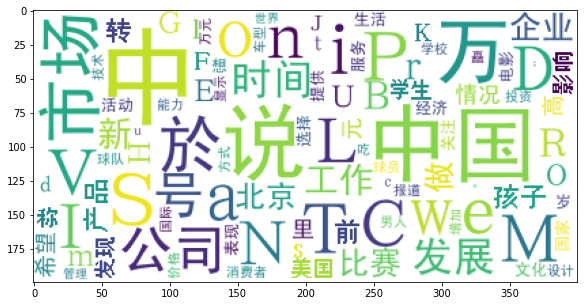

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

###  TF-IDF ：提取关键词###

In [76]:
import jieba.analyse
index = 1000
print (df_news['content'][index])

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏


In [77]:
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))

阿里巴巴  集团  首席  岗位  数据


第一个参数：待提取关键词的文本  
第二个参数：返回关键词的数量，重要性从高到低排序  
第三个参数：是否同时返回每个关键词的权重

###  LDA ：主题模型###

格式要求：list of list形式，分词好的的整个语料

In [78]:
from gensim import corpora, models, similarities
import gensim
#http://radimrehurek.com/gensim/

In [79]:
#做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)#建立词典
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]

In [80]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5) #指定主题数

In [81]:
#一号分类结果
print (lda.print_topic(1, topn=5))

0.005*"说" + 0.005*"男人" + 0.004*"中" + 0.004*"女人" + 0.004*"孩子"


In [82]:
for topic in lda.print_topics(num_topics=20, num_words=5):
    print (topic[1])

0.005*"中" + 0.004*"中国" + 0.003*"Ｓ" + 0.002*"Ｉ" + 0.002*"Ｍ"
0.005*"说" + 0.005*"男人" + 0.004*"中" + 0.004*"女人" + 0.004*"孩子"
0.005*"中" + 0.005*"中国" + 0.003*"说" + 0.003*"比赛" + 0.002*"Ｔ"
0.008*"中" + 0.005*"电影" + 0.004*"说" + 0.003*"观众" + 0.003*"导演"
0.011*"ａ" + 0.010*"ｅ" + 0.008*"ｉ" + 0.008*"ｏ" + 0.007*"ｎ"


In [83]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [84]:
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [85]:
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [87]:
#x_train = x_train.flatten()
x_train[0]

['中新网',
 '上海',
 '日电',
 '于俊',
 '父亲节',
 '网络',
 '吃',
 '一顿',
 '电影',
 '快餐',
 '微',
 '电影',
 '爸',
 '对不起',
 '我爱你',
 '定于',
 '本月',
 '父亲节',
 '当天',
 '各大',
 '视频',
 '网站',
 '首映',
 '葜',
 '谱',
 '鞣',
 '剑',
 '保慈',
 '障蚣',
 '钦',
 '呓',
 '樯',
 '埽',
 '⒌',
 '缬',
 '埃',
 'ǎ',
 '停',
 '椋',
 '悖',
 '颍',
 '铩',
 '妫',
 '椋',
 '恚',
 '称',
 '微型',
 '电影',
 '新',
 '媒体',
 '平台',
 '播放',
 '状态',
 '短时',
 '休闲',
 '状态',
 '观看',
 '完整',
 '策划',
 '系统',
 '制作',
 '体系',
 '支持',
 '显示',
 '较完整',
 '故事情节',
 '电影',
 '微',
 '超短',
 '放映',
 '微',
 '周期',
 '制作',
 '天',
 '数周',
 '微',
 '规模',
 '投资',
 '人民币',
 '几千',
 '数万元',
 '每部',
 '内容',
 '融合',
 '幽默',
 '搞怪',
 '时尚',
 '潮流',
 '人文',
 '言情',
 '公益',
 '教育',
 '商业',
 '定制',
 '主题',
 '单独',
 '成篇',
 '系列',
 '成剧',
 '唇',
 '开播',
 '微',
 '电影',
 '爸',
 '对不起',
 '我爱你',
 '讲述',
 '一对',
 '父子',
 '观念',
 '缺少',
 '沟通',
 '导致',
 '关系',
 '父亲',
 '传统',
 '固执',
 '钟情',
 '传统',
 '生活',
 '方式',
 '儿子',
 '新派',
 '音乐',
 '达',
 '习惯',
 '晚出',
 '早',
 '生活',
 '性格',
 '张扬',
 '叛逆',
 '两种',
 '截然不同',
 '生活',
 '方式',
 '理念',
 '差异',
 '一场',
 '父子',
 '间',
 '拉开序幕',
 '子',
 '失手',
 '打破',
 '父亲'

In [89]:
y_train[0]

7

In [90]:
words = []
for line_index in range(len(x_train)):
    try:
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0]        

'中新网 上海 日电 于俊 父亲节 网络 吃 一顿 电影 快餐 微 电影 爸 对不起 我爱你 定于 本月 父亲节 当天 各大 视频 网站 首映 葜 谱 鞣 剑 保慈 障蚣 钦 呓 樯 埽 ⒌ 缬 埃 ǎ 停 椋 悖 颍 铩 妫 椋 恚 称 微型 电影 新 媒体 平台 播放 状态 短时 休闲 状态 观看 完整 策划 系统 制作 体系 支持 显示 较完整 故事情节 电影 微 超短 放映 微 周期 制作 天 数周 微 规模 投资 人民币 几千 数万元 每部 内容 融合 幽默 搞怪 时尚 潮流 人文 言情 公益 教育 商业 定制 主题 单独 成篇 系列 成剧 唇 开播 微 电影 爸 对不起 我爱你 讲述 一对 父子 观念 缺少 沟通 导致 关系 父亲 传统 固执 钟情 传统 生活 方式 儿子 新派 音乐 达 习惯 晚出 早 生活 性格 张扬 叛逆 两种 截然不同 生活 方式 理念 差异 一场 父子 间 拉开序幕 子 失手 打破 父亲 心爱 物品 父亲 赶出 家门 剧情 演绎 父亲节 妹妹 哥哥 化解 父亲 这场 矛盾 映逋坏 嚼 斫 狻 ⒍ 粤 ⒌ 桨容 争执 退让 传统 尴尬 父子 尴尬 情 男人 表达 心中 那份 感恩 一杯 滤挂 咖啡 父亲节 变得 温馨 镁 缬 缮 虾 Ｎ 逄 煳 幕 传播 迪欧 咖啡 联合 出品 出品人 希望 观摩 扪心自问 父亲节 父亲 记得 父亲 生日 哪一天 父亲 爱喝 跨出 家门 那一刻 感觉 一颗 颤动 心 操劳 天下 儿女 父亲节 大声 喊出 父亲 家人 爱 完'

In [91]:
print (len(words))

3750


In [92]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)#将文本中的词语转换为词频矩阵，它通过fit_transform函数计算各个词语出现的次数

print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [93]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer(ngram_range=(1,4))#将文本中的词语转换为词频矩阵，它通过fit_transform函数计算各个词语出现的次数
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]


- 模型1

In [118]:
from sklearn.feature_extraction.text import CountVectorizer 

vec = CountVectorizer(#构建词频（TF）
    analyzer='word', #一般使用默认，可设置为string类型，如’word’, ‘char’
                      max_features=4000,  #取前max_features个作为关键词集
                      lowercase = False) #不将所有字符变成小写
vec.fit(words)

CountVectorizer(max_features=4000)

In [119]:
#vec.get_feature_names()

In [120]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB() #贝叶斯

classifier.fit(vec.transform(words), y_train)

MultinomialNB()

In [ ]:
alpha：浮点型可选参数，默认为1.0，其实就是添加拉普拉斯平滑，即为上述公式中的λ ，如果这个参数设置为0，就是不添加平滑；
fit_prior：布尔型可选参数，默认为True。布尔参数fit_prior表示是否要考虑先验概率，如果是false，则所有的样本类别输出都有相同的类别先验概率。否则可以自己用第三个参数class_prior输入先验概率，或者不输入第三个参数class_prior，让MultinomialNB自己从训练集样本来计算先验概率，此时的先验概率为 P ( Y = C k ) = m k / m P(Y=C_k)=m_k/mP(Y=C 
k
​	
 )=m 
k
​	
 /m。其中m为训练集样本总数量，m k m_km 
k
​	
 为输出为第k类别的训练集样本数。
class_prior：可选参数，默认为None。

In [121]:
classifier.score(vectorizer.transform(test_words), y_test)

0.808

- 模型2

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer  #原始文本转化为tf-idf的特征矩阵

vectorizer = TfidfVectorizer(#构建TF-IDF
    analyzer='word', max_features=4000,  lowercase = False)#False
vectorizer.fit(words)

TfidfVectorizer(max_features=4000)

In [124]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB() #贝叶斯分类器
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB(alpha=0.2)

In [125]:
classifier.score(vectorizer.transform(test_words), y_test)

0.8176